# Algoritmo de clasificación

## Importar modulos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


## Leer datos

In [41]:
df=pd.read_csv('wdbc.data',header=None)
df.columns=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## Analisis exploratorio de datos

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Se evidencia que no hay variables con valores nulos y que las variables son de tipo numérico a excepción de la columna 'diagnosis' que corresponde a una variable binaria 'M' o 'B'.**

In [43]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.558000e-03   
radius_worst                 13.010000      14.970000  1.87900

**Contamos con un total de 32 caracteristicas, (31 predictoras y 1 variable objetivo). Adicionalmente son 569 registros**

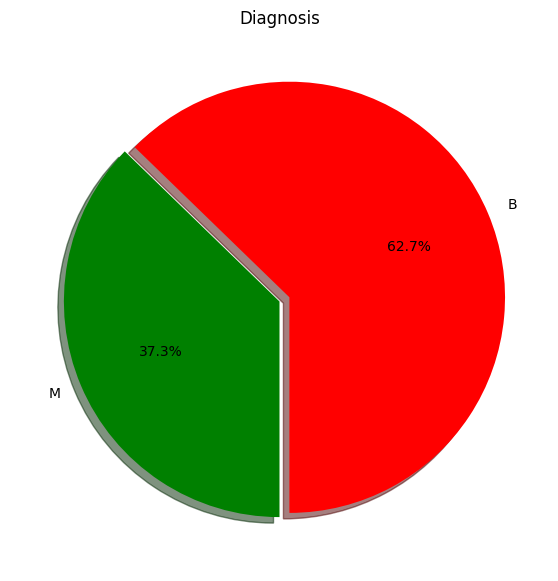

In [44]:
#Grafica de la distribución de los datos en una torta
labels = df['diagnosis'].value_counts(sort = True).index
sizes = df['diagnosis'].value_counts(sort = True)

colors = ["red","green"]
explode = (0.05,0)  # explode 1st slice

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Diagnosis')
plt.show()

**Se puede observar que hay una mayor cantidad de datos en 'Beligno' que en 'maligno'**

C:\Users\PC\AppData\Local\Temp\ipykernel_7236\891857996.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\PC\AppData\Local\Temp\ipykernel_7236\891857996.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\PC\AppData\Local\Temp\ipykernel_7236\891857996.py:6: UserWarning:



`distplot` is a deprecated f

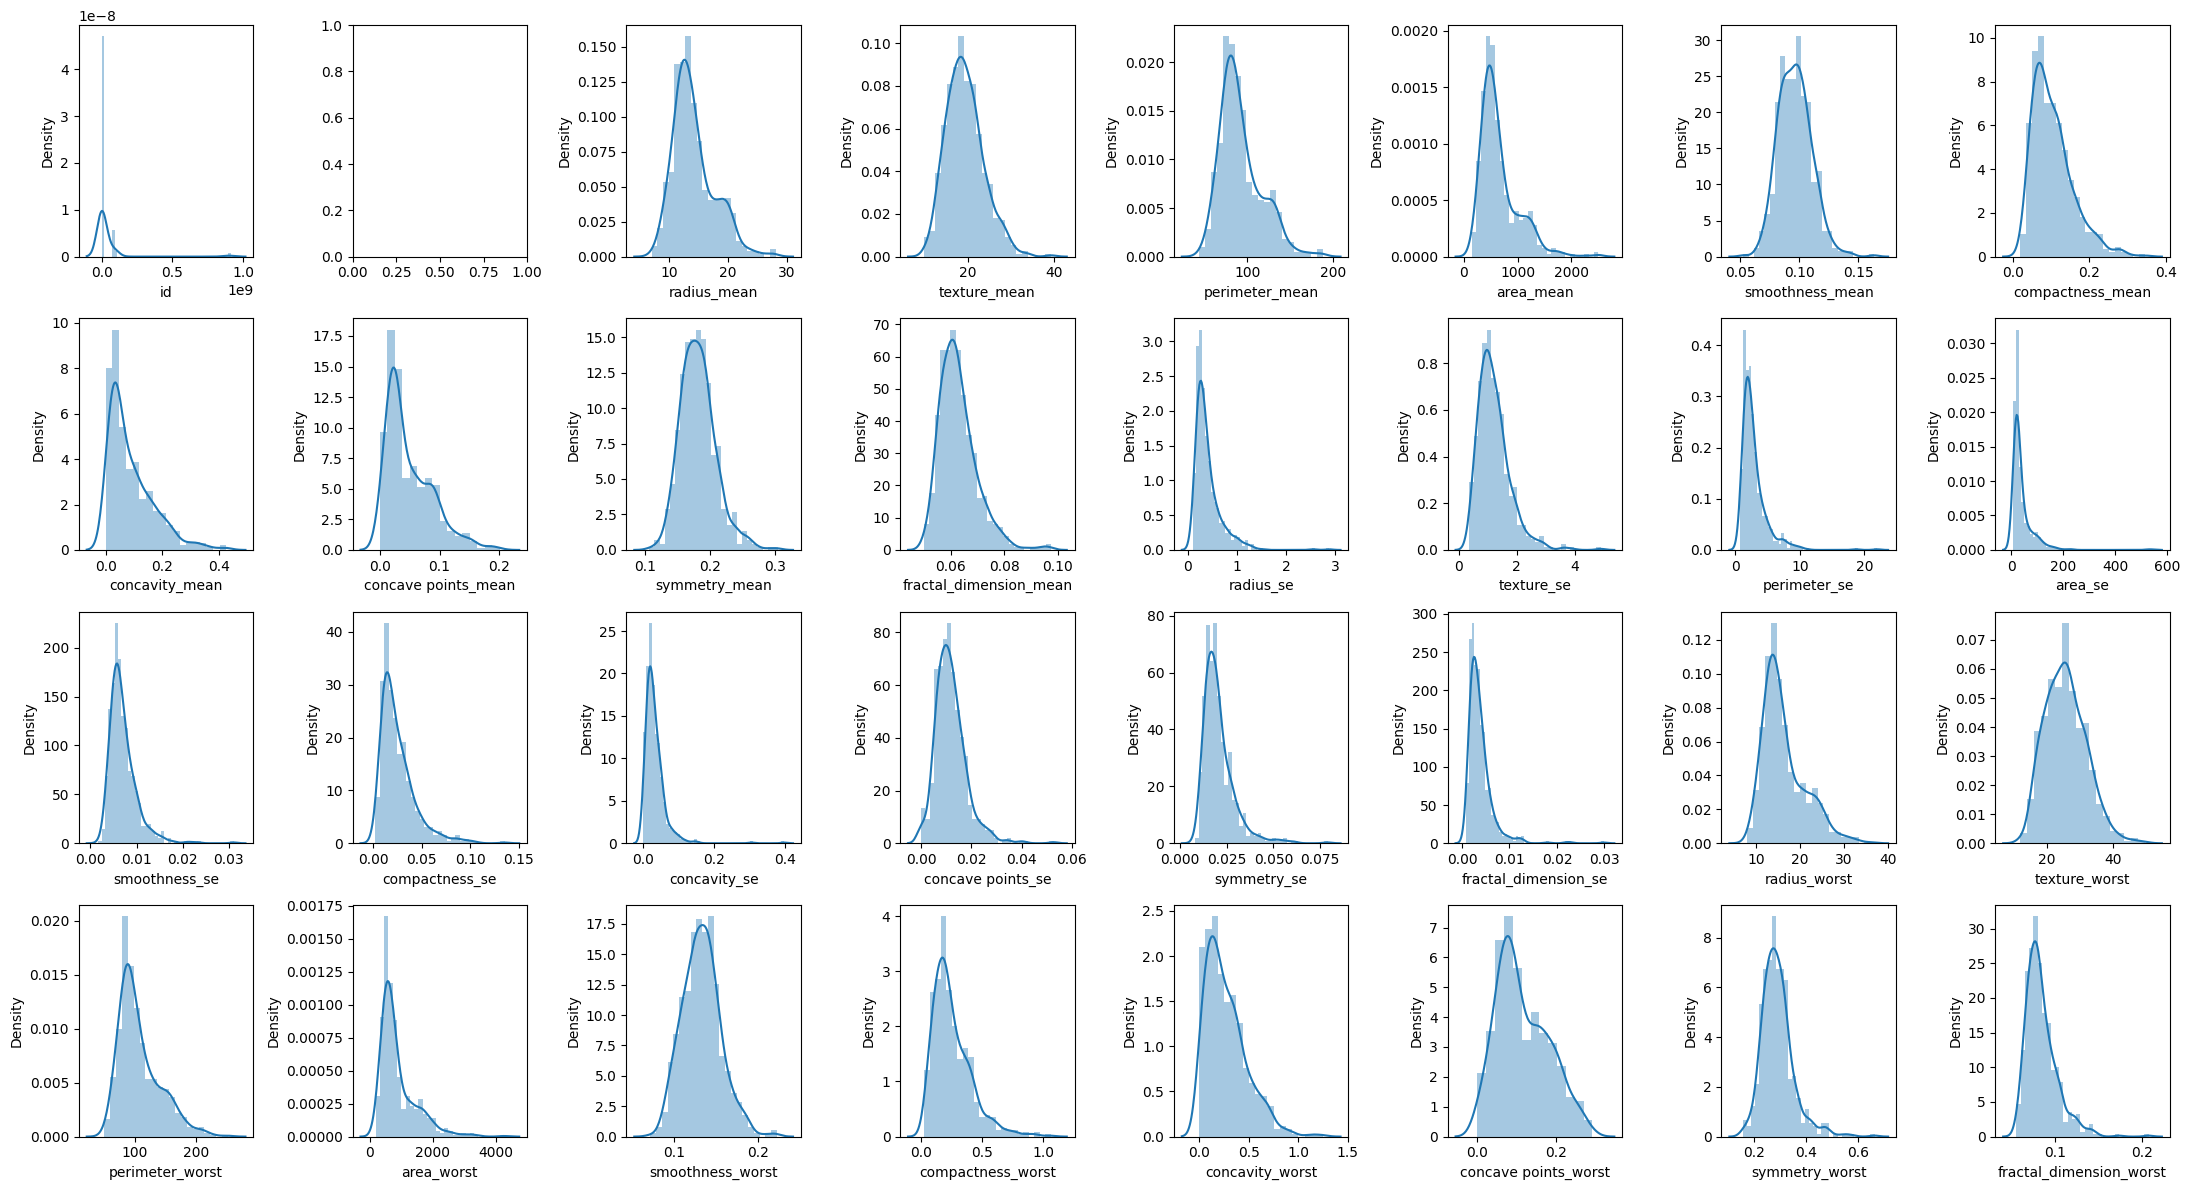

In [45]:
#grafica de la distribución de los datos en un distplot, subplot para mostrar los datos de manera separada
fig, axes = plt.subplots(4, 8, figsize=(22, 12))
for i, ax in enumerate(axes.flat):
    if i == 1:
        continue
    sns.distplot(df.iloc[:,i], ax=ax)
plt.tight_layout()
plt.show()

**Como se puede observar la distribución de las variables predictoras corresponde a una distribución normal**

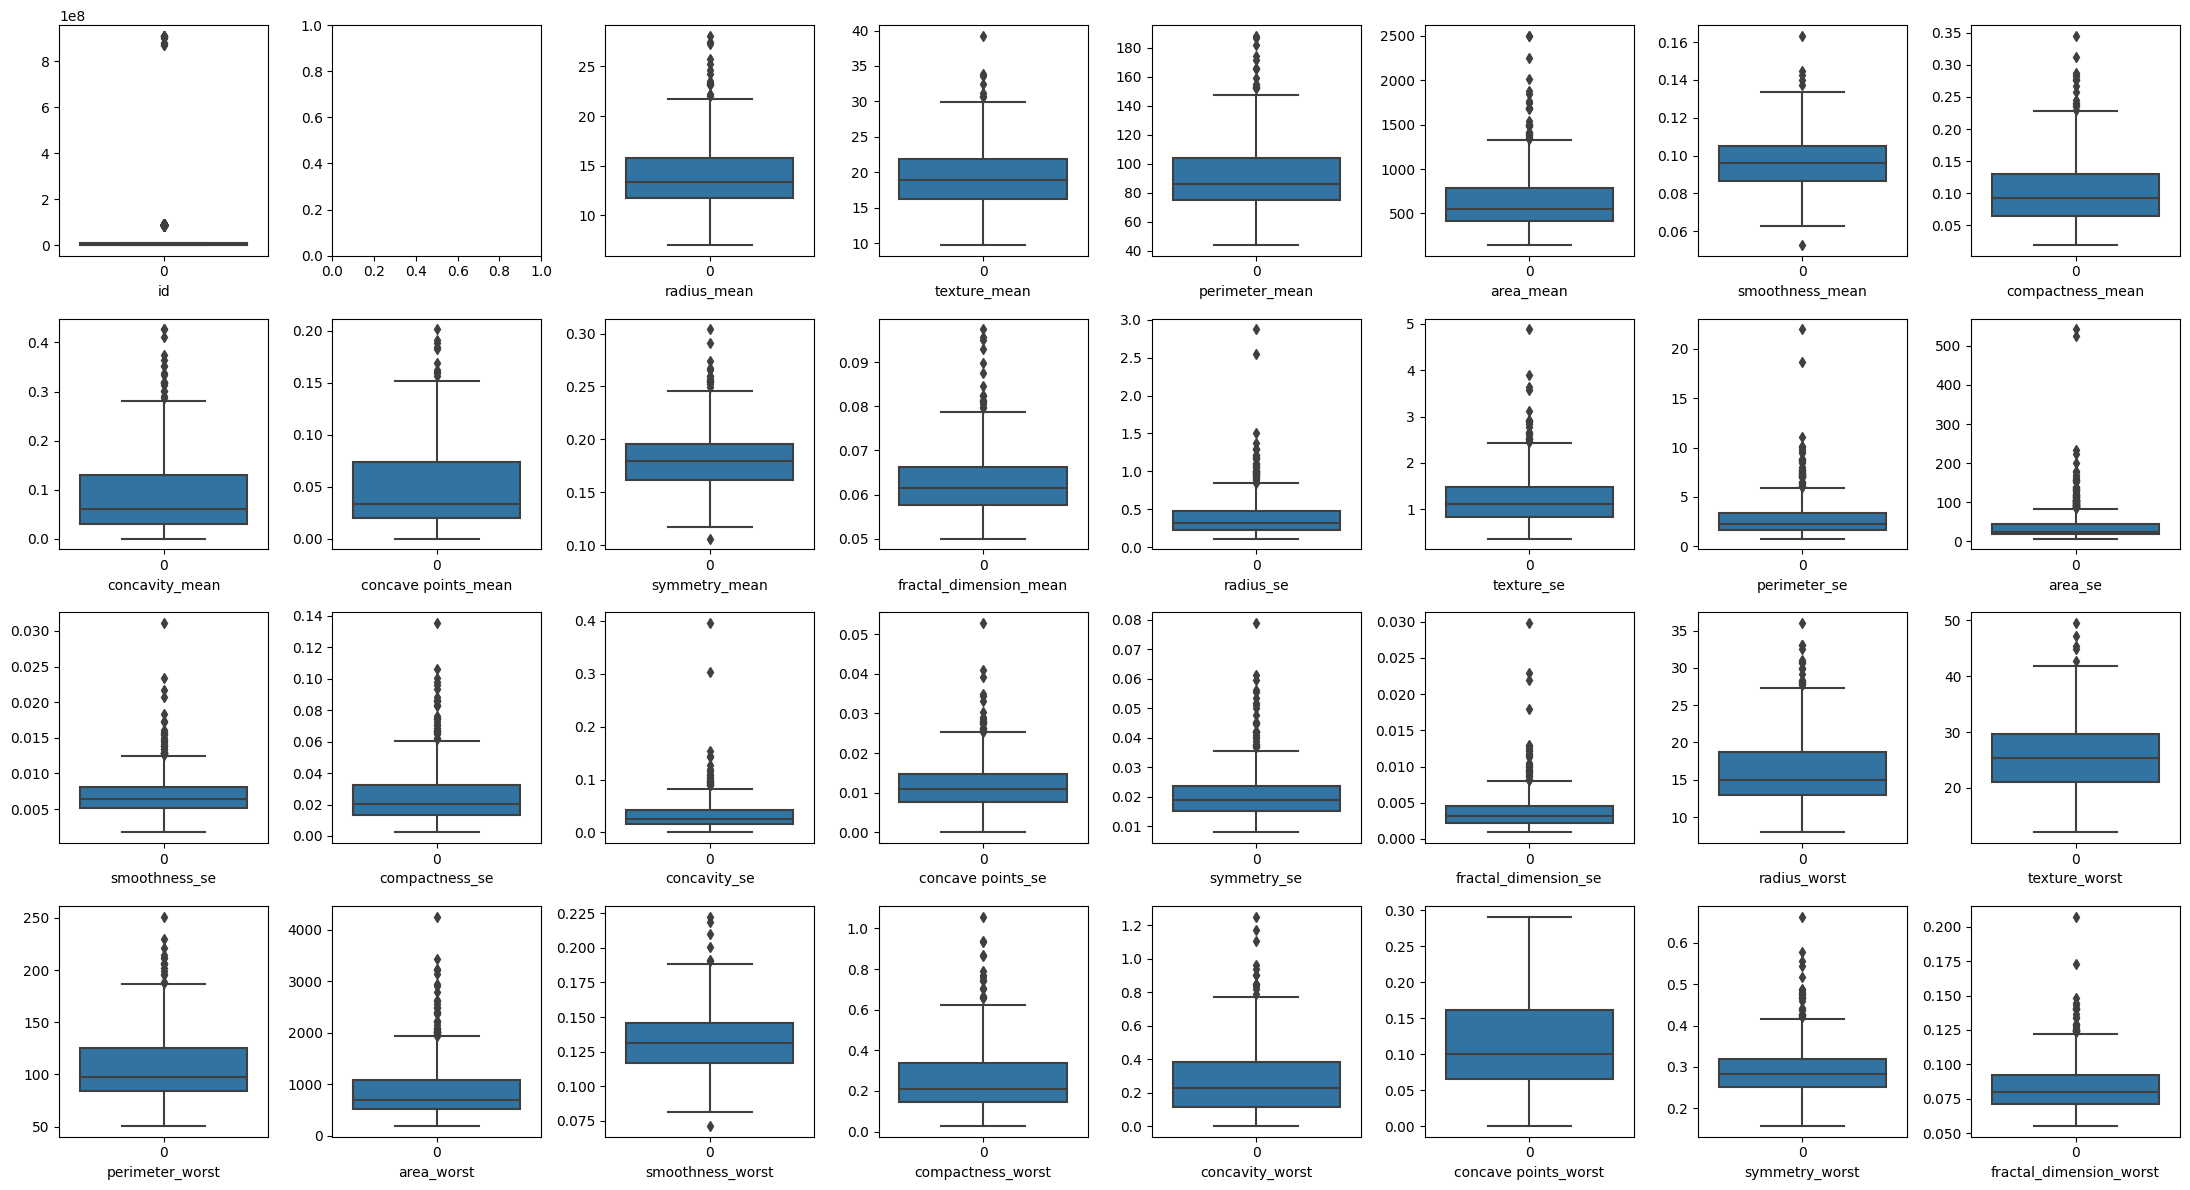

In [46]:
#grafica de la distribución de los datos en un boxplot, subplot para mostrar los datos de manera separada
fig, axes = plt.subplots(4, 8, figsize=(22, 12))
for i, ax in enumerate(axes.flat):
    if i == 1:
        continue
    
    sns.boxplot(df.iloc[:,i], ax=ax)
    ax.set_xlabel(df.columns[i])
    
    
plt.tight_layout()
plt.show()


In [47]:
#grafico de caja y bigotes para todas las variables con plotly
df_pred = df.drop(['id','diagnosis','area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','texture_worst'], axis=1)
fig = px.box(df_pred)
fig.show()

In [48]:
fig = px.box(df, y=['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean','texture_worst'])
fig.show()

**Se puede apreciar que las variables independientes presentan outliers, sin embargo se dejaran para asi evitar un sobre ajuste del modelo final.**

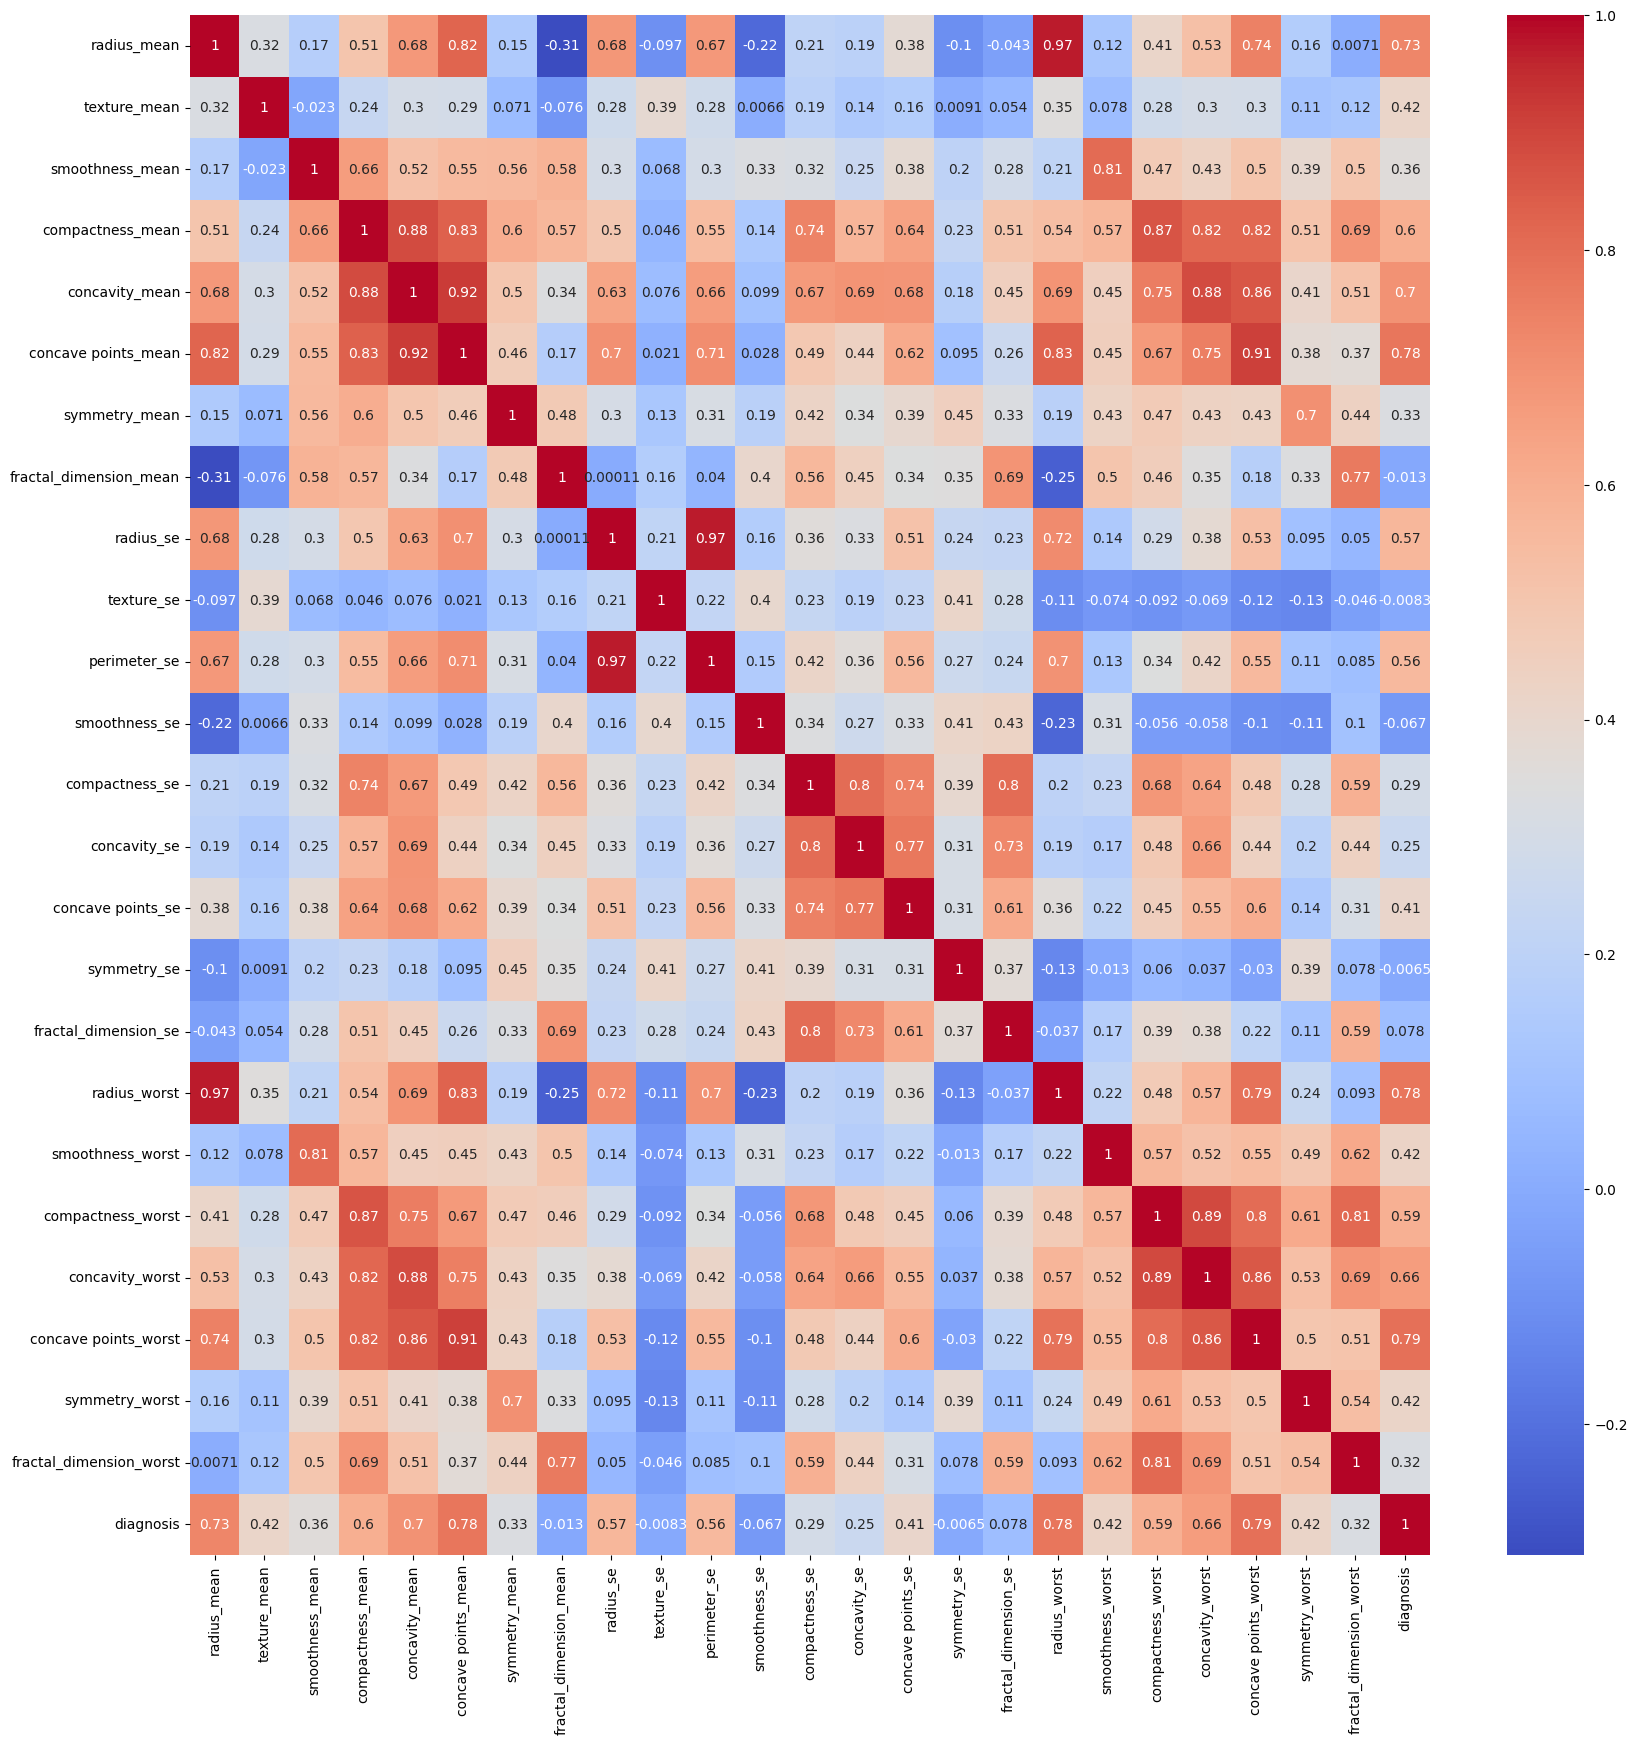

In [49]:
#matriz de correlación
df_pred['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})
corr = df_pred.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Se observa como la variable 'radius_worst' y 'concave points_mean' es la que tiene mayor correlación con la variable objetivo 'diagnosis' y hay otras que no presentan alta correlación**

## Dividir datos

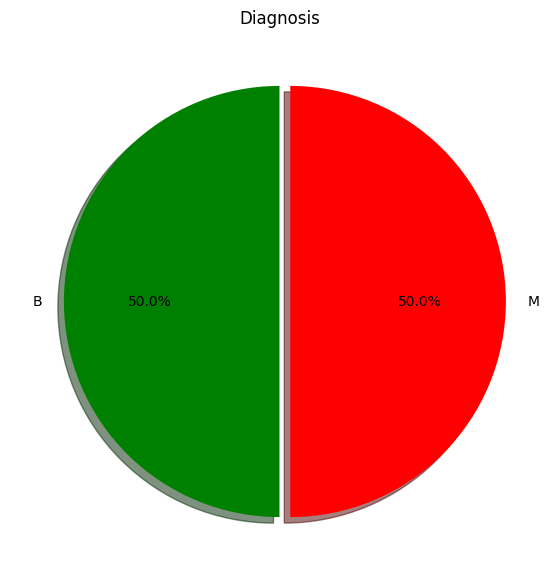

In [50]:
#dividir los datos en train y test y balancearlos

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#balancear los datos

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#se comprueba que los datos estan balanceados con un grafico de torta
labels = y_train.value_counts(sort = True).index
sizes = y_train.value_counts(sort = True)

colors = ["red","green"]
explode = (0.05,0)  # explode 1st slice

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Diagnosis')
plt.show()



## Seleccion de caracteristicas

In [51]:
#seleccionar las variables mas importantes con un modelo de arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel, chi2

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [52]:
clf.feature_importances_

array([0.0127193 , 0.        , 0.02353805, 0.        , 0.00682736,
       0.        , 0.        , 0.00467836, 0.00614035, 0.        ,
       0.        , 0.00623782, 0.        , 0.        , 0.02252124,
       0.00097327, 0.        , 0.        , 0.        , 0.        ,
       0.01653171, 0.        , 0.05100085, 0.74539867, 0.01205587,
       0.00693345, 0.        , 0.002311  , 0.0821327 , 0.        ,
       0.        ])

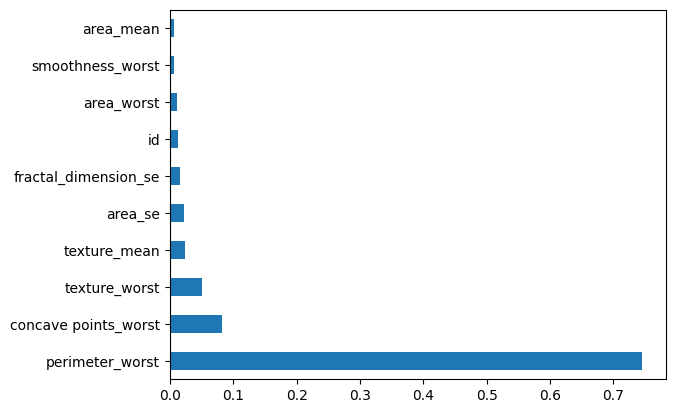

In [53]:
#grafico de las variables mas importantes
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()


**Dado la grafica de importancia de las caracteristicas, se puede observar como las primeras se lleval todo el peso del modelo, en este caso tomaremos las 5 primeras**

In [54]:
#tomar las 5 variables mas importantes
features_top5 = feature_importances.nlargest(5).index
features_top5


Index(['perimeter_worst', 'concave points_worst', 'texture_worst',
       'texture_mean', 'area_se'],
      dtype='object')

## Pipeline

In [55]:
# se crea un pipeline para escalar los datos y convertir  de categorico a numerico

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('one_hot', OrdinalEncoder()),
])

full_pipeline_x = ColumnTransformer([
    ("num", num_pipeline, features_top5)
])

full_pipeline_y = ColumnTransformer([
    ("cat", cat_pipeline, ['diagnosis'])
])

In [56]:
X_test = X_test[features_top5]
X_train = X_train[features_top5]
y_train = pd.DataFrame(y_train, columns=['diagnosis'])
y_test = pd.DataFrame(y_test, columns=['diagnosis'])

In [57]:
# se aplica el pipeline a los datos de train y test
X_train_prepared = full_pipeline_x.fit_transform(X_train)
X_test_prepared = full_pipeline_x.transform(X_test)

y_train_prepared = full_pipeline_y.fit_transform(y_train)
y_test_prepared = full_pipeline_y.transform(y_test)


## GridSearchCV

**La metrica seleccionada fue Recall, debido a que se encarga de validar que los pacientes con una pequeña probabilidad de tener cancer sean diagnosticados con cancer, de tal manera se evitara tener pacientes que esten con cancer sin tratar**

In [58]:
#GridSearch para encontrar los mejores parametros para el modelo de regresion logistica, KNN, RandomForest y SVM


#regresion logistica
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    ]

log_reg = LogisticRegression()
grid_searchLR = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_searchLR.fit(X_train_prepared, y_train_prepared.ravel())

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\PC\AppData\Local\Programs\Python\Python31

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='recall')

In [59]:
print(grid_searchLR.best_params_)
print(grid_searchLR.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9578947368421051


In [60]:
#KNN
param_grid = [
    {'n_neighbors': [3, 7, 9, 19, 21, 23, 39, 41, 47, 49, 65, 67, 69, 71, 73, 77, 79, 81, 93, 95, 97, 99], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    ]

knn = KNeighborsClassifier()
grid_searchKNN = GridSearchCV(knn, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_searchKNN.fit(X_train_prepared, y_train_prepared.ravel())


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [3, 7, 9, 19, 21, 23, 39, 41, 47, 49,
                                          65, 67, 69, 71, 73, 77, 79, 81, 93,
                                          95, 97, 99],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='recall')

In [61]:
print(grid_searchKNN.best_params_)
print(grid_searchKNN.best_score_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
0.9614035087719298


In [62]:
#RandomForest
param_grid = [
    {'n_estimators': [10, 100, 400, 800], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 5, 7], 'min_samples_split': [2, 4, 7, 10]},
    ]

rf = RandomForestClassifier()
grid_searchRF = GridSearchCV(rf, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_searchRF.fit(X_train_prepared, y_train_prepared.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 5, 7],
                          'min_samples_split': [2, 4, 7, 10],
                          'n_estimators': [10, 100, 400, 800]}],
             return_train_score=True, scoring='recall')

In [63]:
print(grid_searchRF.best_params_)
print(grid_searchRF.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 10}
0.9614035087719298


In [64]:
#SVM
param_grid = [
    {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
    ]

svm = SVC()
grid_searchSVM = GridSearchCV(svm, param_grid, cv=5, scoring='recall', return_train_score=True)
grid_searchSVM.fit(X_train_prepared, y_train_prepared.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='recall')

In [65]:
print(grid_searchSVM.best_params_)
print(grid_searchSVM.best_score_)

{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.982456140350877


**Los modelos de knn, logisticRegresion y randomforest presentan el mismo valor de recall, un poco mas bajo que el de SVM. Por su parte random forest demora mucho en tiempo de ejecucion y presenta peores o mismos resultados que los otros algoritmos**

## Comparación de modelos

In [66]:
#grafico de los resultados del best score de cada modelo
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM']
scores = [grid_searchLR.best_score_, grid_searchKNN.best_score_, grid_searchRF.best_score_, grid_searchSVM.best_score_]

figure = px.bar(x=models, y=scores, color=scores, labels={'x':'Model', 'y':'Best Score'},title='Mejor Score de cada modelo')
figure.show()

**Despues de muchos intentos y pruebas, se llego a la conclusion de que el mejor modelo es el de SVM con un recall de 0.97 y con los datos balanceados, por lo cual se escogera como modelo final para el test**

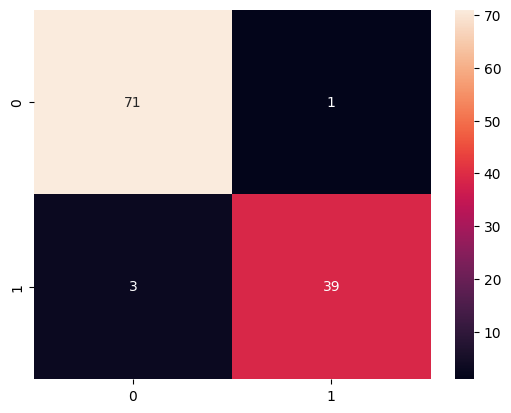

In [67]:
#mejor modelo svm
svm = SVC(C = 10, gamma = 'scale', kernel = 'poly')
svm.fit(X_train_prepared, y_train_prepared.ravel())

#prediccion
y_pred = svm.predict(X_test_prepared)

#matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_prepared, y_pred)

#grafico de la matriz de confusion
import seaborn as sns
cm = confusion_matrix(y_test_prepared, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [68]:
#metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test_prepared, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        72
         1.0       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Analisis de resultados

**- Se puede decir que el mejor modelo no fue el mas complejo, si no que fue el SVM, no aplica para todos los casos**

**- Fue crucial realizar una seleccion de caracteristicas de acuerdo a su importancia, debido a que nos permite trabajar con menos variables, logrando un entrenamiento mas rapido sin perder rendimiento**

**- Aplicando los conocimientos adquiridos en clase, se pudo realizar satisfactoriamente el parcial, logrando como objetivo final obtener un algoritmo de Inteligencia artificial capaz de clasificar de manera adecuada los datos, se realizo el paso a paso tal como se aprendio en clase, dividiendo datos, creando pipeline, y validando los modelos**

**- La validacion cruzada nos permitio evitar el sobreajuste, pudiendo asi con pocos datos crear al menos 5 subconjuntos, despues se seleccionó la metricas de recall para escoger el mejor modelo, cabe destacar que las graficas presentan una ayuda muy importante, ya que es mas facil interpretarla, por ejemplo al momento de comparar los modelos, colocarle un color que identificará cada valor sirvió al momento de seleccionar rapidamente el mejor modelo,   'Una imagen dice mas que mil palabras'**

# Serie de tiempo

## Se lee y se transforma en serie de tiempo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_excel('info_CallCenter.xlsx', sheet_name='Hoja1')

In [3]:
#df = df[df['REGIONAL'] == 'BOGOTA']
df.drop(['REGIONAL'], axis=1, inplace=True)

In [4]:
df.head()

FECHACREACION                           TIPI_2
0 2022-04-11 17:25:00  Voz Fija Interferencia Y Ruidos
1 2022-04-11 17:47:00  Voz Fija Interferencia Y Ruidos
2 2022-04-11 14:31:00  Voz Fija Interferencia Y Ruidos
3 2022-04-11 12:10:00  Voz Fija Interferencia Y Ruidos
4 2022-04-11 11:07:00  Voz Fija Interferencia Y Ruidos

In [5]:
#separar la fecha en dia, mes y año hora
df['fecha']=pd.to_datetime(df['FECHACREACION'],format='%d/%m/%Y %H:%M')
df['dia']=df['fecha'].dt.day
df['mes']=df['fecha'].dt.month
df['año']=df['fecha'].dt.year
df['hora']=df['fecha'].dt.time
df.drop(['FECHACREACION','fecha'],axis=1,inplace=True)
df.head()

TIPI_2  dia  mes   año      hora
0  Voz Fija Interferencia Y Ruidos   11    4  2022  17:25:00
1  Voz Fija Interferencia Y Ruidos   11    4  2022  17:47:00
2  Voz Fija Interferencia Y Ruidos   11    4  2022  14:31:00
3  Voz Fija Interferencia Y Ruidos   11    4  2022  12:10:00
4  Voz Fija Interferencia Y Ruidos   11    4  2022  11:07:00

In [6]:
lista_tipi_2 = df.TIPI_2.unique()
lista_tipi_2

array(['Voz Fija Interferencia Y Ruidos',
       'Television Problema con la Imagen', 'Internet No navega',
       'Internet', 'Television', 'Voz Fija', 'Internet Lentitud',
       'Internet WiFi', 'Television Problema Canales',
       'Internet Intermitencia', 'Television Problema Control Remoto',
       'Television Problema Decodificador',
       'Internet Escalamiento abierto', 'Television Escalamiento abierto',
       'Voz Fija Escalamiento abierto', 'Television Problema Audio',
       'Voz Fija No Tono', 'Voz Fija No Entran/Salen Llamadas',
       'Television Problema con la Tarjeta',
       'Television Problema Movistar Play', 'Voz Fija Tono de Ocupado',
       'Internet SVA', 'Voz Fija SVA', 'Voz Fija Mala calidad de voz',
       'Voz Fija Tono permanente',
       'Voz Fija No recibe no realiza llamadas'], dtype=object)

In [7]:
#graficar la cantidad de datos por tipi_2
fig = px.histogram(df, x="TIPI_2", color="TIPI_2", title='Cantidad de datos por TIPI_2')
fig.show()


In [8]:
lista_tipi_2[2]

'Internet No navega'

In [9]:
#agrupar por dia la columna TIPI_2 los datos iguales a 'Internet No navega'
df_prediccion = df[df['TIPI_2']==lista_tipi_2[2]]
df_Internet = df_prediccion.groupby(['dia','mes','año'])['TIPI_2'].value_counts()

#resetear el indice
df_serie=pd.DataFrame()
df_serie['Y']=df_Internet.values

#obtener el año, mes y dia
df_serie['año']=df_Internet.index.get_level_values(2)
df_serie['mes']=df_Internet.index.get_level_values(1)
df_serie['dia']=df_Internet.index.get_level_values(0)

#el indice sera el dia, el mes y año concatenados formato fecha
df_serie.index = pd.to_datetime(df_serie['año'].astype(str)+'-'+df_serie['mes'].astype(str)+'-'+df_serie['dia'].astype(str))
df_serie.drop(['año','mes','dia'],axis=1,inplace=True)
df_serie.sort_index(inplace=True)

In [10]:
print(df_serie.head())
df_serie.index.rename('fecha', inplace=True)
df_serie.to_csv('df_serie.csv')

              Y
2022-04-11  794
2022-04-12  799
2022-04-13  716
2022-04-14  334
2022-04-15  265


In [11]:
serie = pd.read_csv('df_serie.csv',squeeze=True, index_col='fecha')
serie.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_10276\1033942476.py:1: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





fecha
2022-04-11    794
2022-04-12    799
2022-04-13    716
2022-04-14    334
2022-04-15    265
Name: Y, dtype: int64

## EDA

In [12]:
serie.info()

<class 'pandas.core.series.Series'>
Index: 62 entries, 2022-04-11 to 2022-06-11
Series name: Y
Non-Null Count  Dtype
--------------  -----
62 non-null     int64
dtypes: int64(1)
memory usage: 992.0+ bytes


In [13]:
serie.tail()

fecha
2022-06-07    920
2022-06-08    785
2022-06-09    930
2022-06-10    787
2022-06-11    688
Name: Y, dtype: int64

In [14]:
#grafico de la serie con plotly
fig = px.line(serie, x=serie.index, y='Y', title='Serie de tiempo de llamadas por (Internet No navega) por dia')

fig.show()

**La grafica representa la cantidad de llamadas duarnte un tiempo, correspondiente al año 2022**

## Dividir datos

In [15]:
#divir la serie en train y test
train = serie[:'2022-05-22']
test = serie['2022-05-23':]

In [16]:
#grafico de la serie con plotly
fig = px.line(title='Serie de tiempo de llamadas por (Internet No navega) por dia')
fig.add_scatter(x=train.index, y=train, mode='lines', name='train')
fig.add_scatter(x=test.index, y=test, mode='lines', name='test')
fig.show()

## Serie estacionaria

In [17]:
#Determinar si es estacionaria
#calcular varianza enn varias partes de la serie
var1 = train[:20].var()
print('varianza 1: ', var1)
var2 = train[20:40].var()
print('varianza 2: ', var2)
var3 = train[40:60].var()
print('varianza 3: ', var3)

varianza 1:  63326.36578947367
varianza 2:  54519.221052631576
varianza 3:  22472.0


In [18]:
#calcular la media de la serie
media = train[:20].mean()
print('media: ', media)
media2 = train[20:40].mean()
print('media2: ', media2)
media3 = train[40:60].mean()
print('media3: ', media3)

media:  621.05
media2:  827.8
media3:  524.0


In [19]:
from statsmodels.tsa.stattools import adfuller

p_series = adfuller(train)
print('p-value: ', p_series[1])

p-value:  0.29211911933250934


**La serie de tiempo no es estacionaria**

## Random Walk

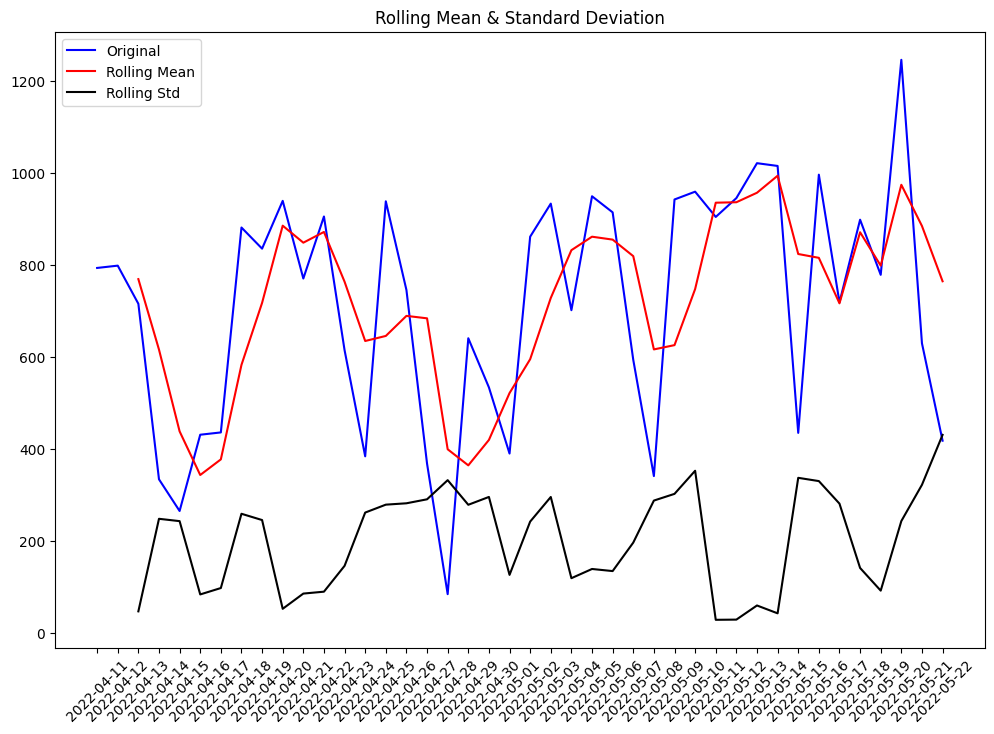

Results of Dickey-Fuller Test:
Test Statistic                 -1.987413
p-value                         0.292119
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [20]:
#Determinar si es un Random Walk
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
        
        #Determinar la media movil
        rolmean = timeseries.rolling(window=3).mean()
        rolstd = timeseries.rolling(window=3).std()
    
        #Graficar la media movil:
        fig = plt.figure(figsize=(12, 8))
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.xticks(rotation=45)
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Realizar el test de Dickey-Fuller:
        print ('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print (dfoutput)

test_stationarity(train)

## Modelo ARIMA

In [33]:
#MODELO ARIMA
#shift de la serie
df = pd.DataFrame(train)
df['t-1'] = df['Y'].shift(1)
df['t-2'] = df['Y'].shift(2)


df.head()

Y    t-1    t-2
fecha                        
2022-04-11  794    NaN    NaN
2022-04-12  799  794.0    NaN
2022-04-13  716  799.0  794.0
2022-04-14  334  716.0  799.0
2022-04-15  265  334.0  716.0

In [34]:
df_test = pd.DataFrame(test)
df_test['t-1'] = df_test['Y'].shift(1)
df_test['t-2'] = df_test['Y'].shift(2)

df_test.head()

Y     t-1     t-2
fecha                           
2022-05-23  1020     NaN     NaN
2022-05-24   967  1020.0     NaN
2022-05-25   780   967.0  1020.0
2022-05-26   872   780.0   967.0
2022-05-27   760   872.0   780.0

In [35]:
#residuos
df['residuo'] = df['Y'] - df['t-1']

In [36]:
df_test['residuo'] = df_test['Y'] - df_test['t-1']

In [37]:
df_residuos = pd.DataFrame(df['residuo'])
df_residuos.head()

residuo
fecha              
2022-04-11      NaN
2022-04-12      5.0
2022-04-13    -83.0
2022-04-14   -382.0
2022-04-15    -69.0

In [38]:
df_residuos_test = pd.DataFrame(df_test['residuo'])
df_residuos_test.head()

residuo
fecha              
2022-05-23      NaN
2022-05-24    -53.0
2022-05-25   -187.0
2022-05-26     92.0
2022-05-27   -112.0

In [39]:
#shift de los residuos

df_residuos['t-1'] = df_residuos['residuo'].shift(1)
df_residuos['t-2'] = df_residuos['residuo'].shift(2)

df_residuos.head()

residuo    t-1   t-2
fecha                           
2022-04-11      NaN    NaN   NaN
2022-04-12      5.0    NaN   NaN
2022-04-13    -83.0    5.0   NaN
2022-04-14   -382.0  -83.0   5.0
2022-04-15    -69.0 -382.0 -83.0

In [40]:
df_residuos_test['t-1'] = df_residuos_test['residuo'].shift(1)
df_residuos_test['t-2'] = df_residuos_test['residuo'].shift(2)


df_residuos_test.head()

residuo    t-1    t-2
fecha                            
2022-05-23      NaN    NaN    NaN
2022-05-24    -53.0    NaN    NaN
2022-05-25   -187.0  -53.0    NaN
2022-05-26     92.0 -187.0  -53.0
2022-05-27   -112.0   92.0 -187.0

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge


#crear un modelo de regresion lineal con los residuos
model = Ridge(alpha=0.1, normalize=True, max_iter=1000)
df_residuos = df_residuos.dropna()
print(df.head())
model.fit(df_residuos[['t-1','t-2']],df_residuos['residuo'])
#obtener los coeficientes
model.coef_


              Y    t-1    t-2  residuo
fecha                                 
2022-04-11  794    NaN    NaN      NaN
2022-04-12  799  794.0    NaN      5.0
2022-04-13  716  799.0  794.0    -83.0
2022-04-14  334  716.0  799.0   -382.0
2022-04-15  265  334.0  716.0    -69.0


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



array([-0.37615375, -0.28663161])

In [131]:
def y_hat(df,df_residuos):
    df=df.dropna()
    y_hat = df['t-1'] + model.coef_[0]*df_residuos['t-1'] + model.coef_[1]*df_residuos['t-2']
    y_hat = y_hat.dropna()
    return y_hat

In [132]:
y_hat(df,df_residuos).head()

fecha
2022-04-14    745.787603
2022-04-15    501.481155
2022-04-16    400.447884
2022-04-17    388.336059
2022-04-18    386.538384
dtype: float64

In [133]:
y_hat(df_test,df_residuos_test).head()

fecha
2022-05-26    865.532226
2022-05-27    890.993966
2022-05-28    775.759112
2022-05-29    705.388111
2022-05-30    615.924864
dtype: float64

In [134]:
#graficar con plotly
fig = px.line()
fig.add_scatter(x=y_hat(df,df_residuos).index, y=y_hat(df,df_residuos), mode='lines', name='y_hat')
fig.add_scatter(x=df.index, y=df['Y'], mode='lines', name='original')
fig.show()

## Evaluacion del modelo

In [135]:
#Evaluar con RMSE en train y test

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_train = sqrt(mean_squared_error(df['Y'][3:], y_hat(df,df_residuos)))
print('RMSE train: ', rmse_train)

rmse_test = sqrt(mean_squared_error(test[3:], y_hat(df_test,df_residuos_test)))
print('RMSE test: ', rmse_test)

RMSE train:  282.13494389217294
RMSE test:  321.01596031256923


## Modelo de persistencia

In [136]:
#modelo de persistencia

def y_hat_persistencia(df):
    df=df.dropna()
    y_hat = df['t-1']
    y_hat = y_hat.dropna()
    return y_hat
y_hat_persistencia(df)

fecha
2022-04-13     799.0
2022-04-14     716.0
2022-04-15     334.0
2022-04-16     265.0
2022-04-17     431.0
2022-04-18     436.0
2022-04-19     882.0
2022-04-20     836.0
2022-04-21     940.0
2022-04-22     771.0
2022-04-23     906.0
2022-04-24     615.0
2022-04-25     384.0
2022-04-26     939.0
2022-04-27     746.0
2022-04-28     368.0
2022-04-29      84.0
2022-04-30     641.0
2022-05-01     534.0
2022-05-02     390.0
2022-05-03     862.0
2022-05-04     934.0
2022-05-05     702.0
2022-05-06     950.0
2022-05-07     915.0
2022-05-08     594.0
2022-05-09     341.0
2022-05-10     943.0
2022-05-11     960.0
2022-05-12     905.0
2022-05-13     946.0
2022-05-14    1022.0
2022-05-15    1016.0
2022-05-16     435.0
2022-05-17     997.0
2022-05-18     719.0
2022-05-19     899.0
2022-05-20     779.0
2022-05-21    1247.0
2022-05-22     630.0
Name: t-1, dtype: float64

In [141]:
#graficar con plotly
fig = px.line()
fig.add_scatter(x=df.index, y=df['Y'], mode='lines', name='original')
fig.add_scatter(x=y_hat_persistencia(df).index, y=y_hat_persistencia(df), mode='lines', name='y_hat')
fig.show()

In [138]:
#comparar los 2 modelos
rmse_train_persistencia = sqrt(mean_squared_error(df['Y'][2:], y_hat_persistencia(df)))
print('RMSE train persistencia: ', rmse_train_persistencia)

rmse_test_persistencia = sqrt(mean_squared_error(test[2:], y_hat_persistencia(df_test)))
print('RMSE test persistencia: ', rmse_test_persistencia)


RMSE train persistencia:  308.2209840358051
RMSE test persistencia:  318.1780598623635


In [142]:
#graficar con plotly
fig = px.line()
fig.add_scatter(x=df.index, y=df['Y'], mode='lines', name='original')
fig.add_scatter(x=y_hat(df,df_residuos).index, y=y_hat(df,df_residuos), mode='lines', name='y_hat')
fig.add_scatter(x=y_hat_persistencia(df).index, y=y_hat_persistencia(df), mode='lines', name='y_hat_persistencia')
fig.show()

In [144]:
#graficar los errores rmse con barmode group
fig = px.bar(title='Comparacion de errores RMSE')
fig.add_bar(x=['train','test'], y=[rmse_train, rmse_test], name='ARIMA')
fig.add_bar(x=['train','test'], y=[rmse_train_persistencia, rmse_test_persistencia], name='Persistencia')
fig.update_layout(barmode='group')
fig.show()